In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv("Life_Expectancy_No_Missing_Vals.csv").set_index("Unnamed: 0")


In [4]:
cont = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
 'hepatitis_b', 'measles','bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
 'hiv/aids', 'gdp', 'population', 'thinness__10-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
 'schooling']

cat = ['year','country', 'status']

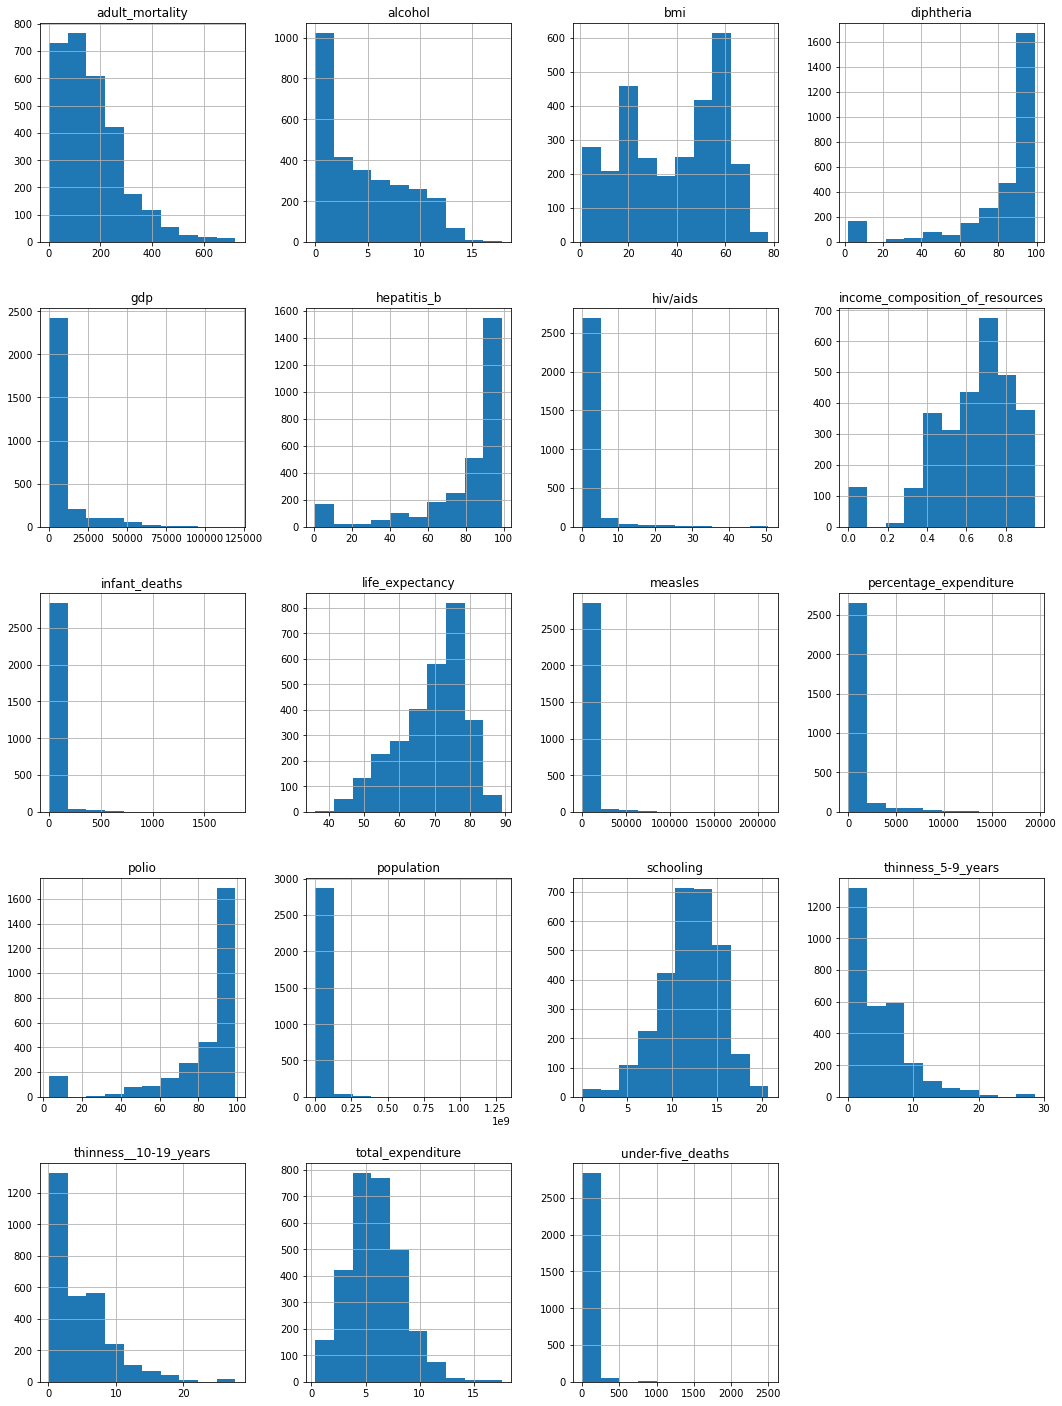

In [5]:
df[cont].hist(figsize=(18,25))
plt.show()

Based on the above, we should do the following:

- Apply Log transforms to adult mortality, alcohol, diphtheria, gdp, hepatitis_b, hiv_aids, infant deaths, measles, percentage expenditure, polio, population, thinness_5-9_years, thinness__10-19_years, under-five_deaths
- We should test our model against a log and a non log target, i think log will be better based on distribution

In [6]:
log_cols = ["adult_mortality", "alcohol", "diphtheria", "gdp", "hepatitis_b", "hiv/aids", 
        "infant_deaths", "measles", "percentage_expenditure", "polio", "population", "thinness_5-9_years", 
        "thinness__10-19_years", "under-five_deaths"]


In [7]:
df['percentage_expenditure'].values.any() == 0

False

In [8]:
df['percentage_expenditure'].isin([0]).any()

True

In [9]:
logs = []
for col in log_cols:
    if df[col].isin([0]).any():
        df[col] = df[col] + 1
        df["log_{}".format(col)] = np.log(df[col])
    else:
        df["log_{}".format(col)] = np.log(df[col])

In [10]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__10-19_years,thinness_5-9_years,gdp,population,income_composition_of_resources,schooling
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,454.366654,12777511.0,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,453.351155,12633897.0,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,57.348340,125525.0,0.427,10.0


### Do the values of schooling change significantly in developed vs developing countries?

- In this section, we will first check the distributions of schooling from these two groups
- Then, we will run a hypothesis test to determine if there is a significant difference
- If we find that there is a difference, we will plot both scatterplots of the two groups data, as well as regression lines for each group. If we find some overlap in the regression lines, then that is strong evidence that there is some interaction between the two variables. 
- If we find interaction among the variables, then we will engineer a new interaction feature in our notebook where we build a model

Text(0.5, 1.0, 'Developing Countries')

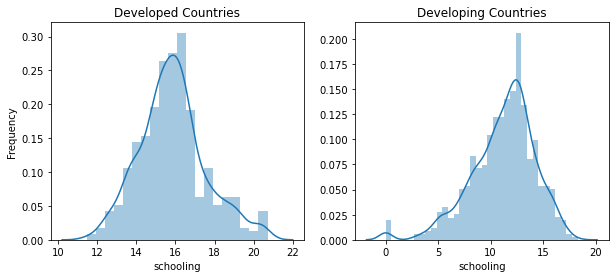

In [15]:
fig = plt.subplots(figsize=(10,4))
ax1 = plt.subplot(121)
sns.distplot(df[df.status=='Developed'].schooling, ax=ax1)
ax1.set_title("Developed Countries")
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(122)
sns.distplot(df[df.status=='Developing'].schooling, ax=ax2)
ax2.set_title("Developing Countries")


Based on the distributions above we can see that they are normal enough to perform some t tests. We want to first run a test to see if schooling changes from developed to developing countries. If we find there is a significant difference, then we will further investigate whether or not there is an interaction between schooling and status when trying to predict life expectancy.

- $H_{0}$: Schooling from different country statuses is the same
- $H_{a}$: Schooling from different country statuses is not the same

Will run a two sample t test from the two populations using an $\alpha$ of 5% 

In [45]:
developed_schooling = df[df.status == 'Developed']
developing_schooling = df[df.status == 'Developing']

In [46]:
x_devd = np.mean(developed_schooling.schooling)
x_devping = np.mean(developing_schooling.schooling)

n_devd = len(developed_schooling)
n_devping = len(developing_schooling)

s_devd = np.std(developed_schooling.schooling)
s_devping = np.std(developing_schooling.schooling)

num = ((n_devd-1)*s_devd**2) + ((n_devping-1)*s_devping**2)
denom = n_devd + n_devping - 2
s_pooled = num / denom

num = x_devd - x_devping
denom = np.sqrt(s_pooled * ((1/n_devd) + (1/n_devping)))
t = num / denom
t

33.52004010972154

Our calculated t statistic, using pooled variances and a 2 sample t test, comes out to 33.5. This is far larger than a t critical value of 1.96 for a 95% condifence test, and so we will reject the null hypothesis. Therefore, we can say with 95% confidence that schooling from developed vs developing countries is different. 

In [18]:
plt.figure(figsize=(12,7))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

school_1 = developed_schooling['schooling'].values.reshape(-1, 1)
school_2 = developing_schooling['schooling'].values.reshape(-1, 1)

regression_1.fit(school_1, developed_schooling['life_expectancy'])
regression_2.fit(school_2, developing_schooling['life_expectancy'])

# Make predictions using the testing set
pred_1 = regression_1.predict(school_1)
pred_2 = regression_2.predict(school_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

[0.92596634]
[2.05612325]


<Figure size 864x504 with 0 Axes>

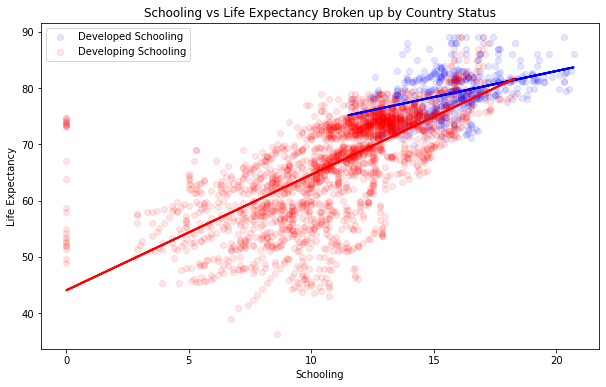

In [19]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.title("Schooling vs Life Expectancy Broken up by Country Status")

plt.scatter(school_1, developed_schooling['life_expectancy'],  color='blue', alpha = 0.1, label = 'Developed Schooling')
plt.scatter(school_2, developing_schooling['life_expectancy'],  color='red', alpha = 0.1, label = 'Developing Schooling')

plt.plot(school_1, pred_1,  color='blue', linewidth=2)
plt.plot(school_2, pred_2,  color='red', linewidth=2)

plt.ylabel('Life Expectancy')
plt.xlabel('Schooling')
plt.legend();

From the above graph, we can see that schooling is far more important in a developing country. Less schooling in a developing country has a strong impact on life expectancy, whereas in a developed country, it is less important.

In [41]:
X = pd.concat([df, pd.get_dummies(df.status, drop_first=True)], axis=1).drop([
    'country', 'year', 'status', 'life_expectancy'],axis=1)
y = df['life_expectancy']

In [42]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2['school_status'] = X['schooling'] * X['Developing']


In [44]:
import statsmodels.api as sm
X_interact_2 = sm.add_constant(X_interact_2)
model = sm.OLS(y,X_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     730.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:48:25   Log-Likelihood:                -8124.6
No. Observations:                2928   AIC:                         1.629e+04
Df Residuals:                    2907   BIC:                         1.642e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              58.8089      1.764     33.345      0.000      55.351      62.267
adult_mortality                    -0.0177      0.001    -22.911      0.000      -0.019      -0.016
infant_deaths                       0.0958      0.008     11.806      0.000       0.080       0.112
alcohol                             0.0094      0.025      0.371      0.711      -0.040       0.059
percentage_expenditure              0.0002   6.77e-05      2.309      0.021    2.36e-05       0.000
hepatitis_b                        -0.0040      0.004     -1.062      0.288      -0.011       0.003
measles                         -1.311e-05   7.35e-06     -1.783      0.075   -2.75e-05    1.31e-06
bmi                                 0.0382      0.005      7.958      0.000       0.029       0.048
under-five_deaths                  -0.0712      0.006    -11.967      0.000      -0.083      -0.060
polio                               0.0267      0.004      6.178      0.000       0.018       0.035
total_expenditure                   0.0104      0.032      0.321      0.748      -0.053       0.074
diphtheria                          0.0306      0.005      6.605      0.000       0.021       0.040
hiv/aids                           -0.4749      0.017    -28.118      0.000      -0.508      -0.442
thinness__10-19_years              -0.0728      0.048     -1.503      0.133      -0.168       0.022
thinness_5-9_years                  0.0029      0.048      0.062      0.951      -0.091       0.097
gdp                              3.573e-05   1.02e-05      3.495      0.000    1.57e-05    5.58e-05
population                       -1.32e-09   1.49e-09     -0.886      0.375   -4.24e-09     1.6e-09
income_composition_of_resources     5.8284      0.623      9.359      0.000       4.607       7.049
schooling                           0.5414      0.105      5.172      0.000       0.336       0.747
Developing                         -5.4545      1.737     -3.141      0.002      -8.859      -2.050
school_status                       0.2847      0.110      2.587      0.010       0.069       0.500
==============================================================================
Omnibus:                      152.735   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.812
Skew:                          -0.042   Prob(JB):                    9.20e-126
Kurtosis:                       5.171   Cond. No.                     2.08e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+09. This might indicate that there are
strong multicollinearity o